In [114]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import seaborn as sns

sns.set(style='white', context='notebook', palette='muted')
import matplotlib.pyplot as plt
train=pd.read_csv('/Users/apple/Desktop/dataanalyse/titanic/train.csv')
test=pd.read_csv('/Users/apple/Desktop/dataanalyse/titanic/test.csv')

In [115]:
train.shape
test.shape

(418, 11)

In [116]:
# full is the combination of train and test
full = pd.concat([train, test], ignore_index=True)
full.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [117]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


<Axes: xlabel='Embarked', ylabel='Survived'>

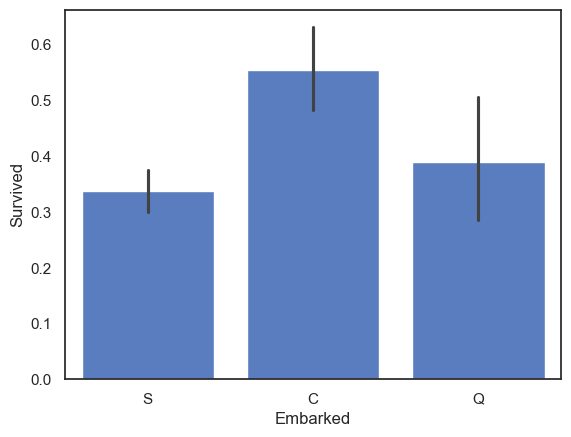

In [118]:
sns.barplot(data=train, x='Embarked', y='Survived')

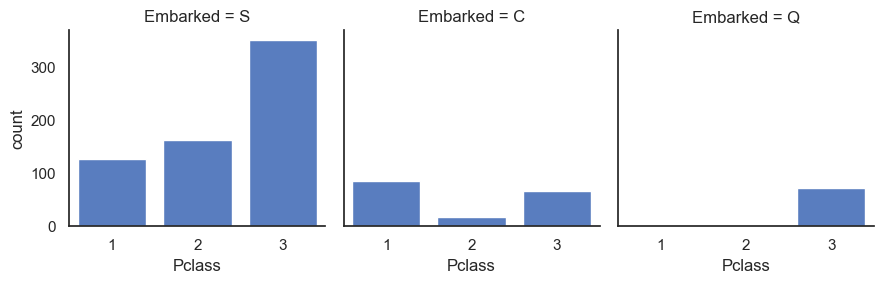

In [119]:
sns.catplot(x='Pclass', col='Embarked', data=train, kind='count', height=3)

<Axes: xlabel='Parch', ylabel='Survived'>

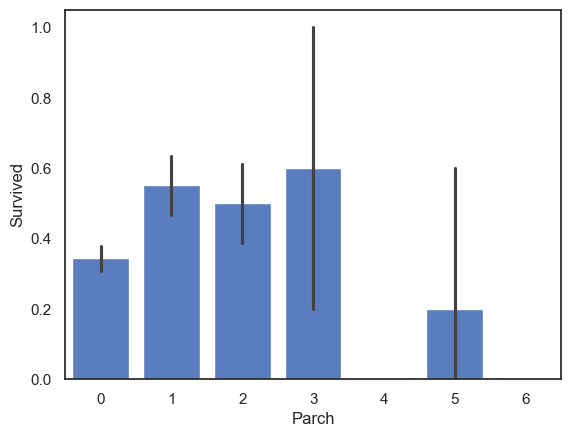

In [120]:
sns.barplot(data=train,x='Parch',y='Survived')

<Axes: xlabel='SibSp', ylabel='Survived'>

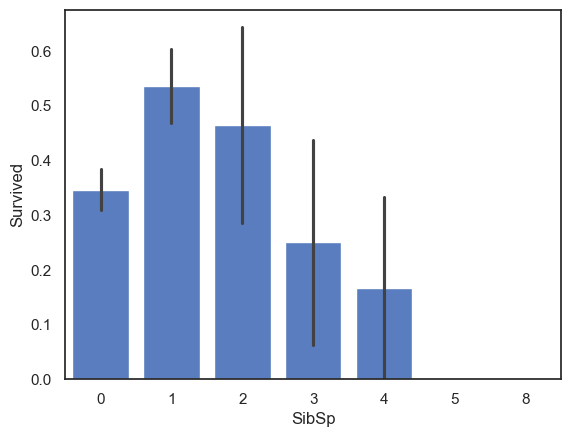

In [121]:
sns.barplot(data=train,x='SibSp',y='Survived')

<Axes: xlabel='Pclass', ylabel='Survived'>

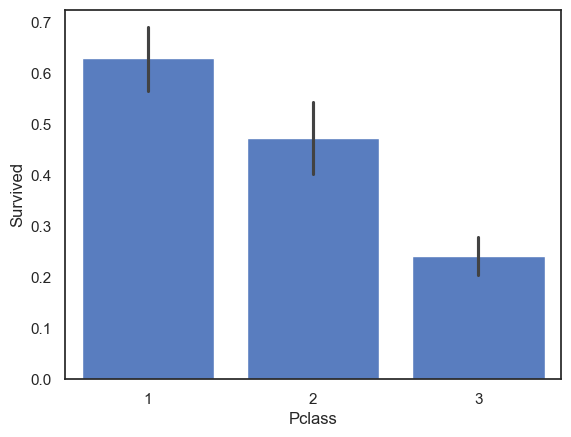

In [122]:
sns.barplot(data=train, x='Pclass', y='Survived')

<Axes: xlabel='Sex', ylabel='Survived'>

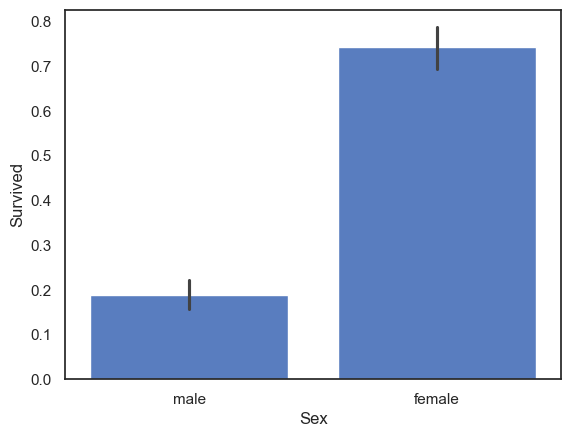

In [123]:
sns.barplot(data=train,x='Sex',y='Survived')

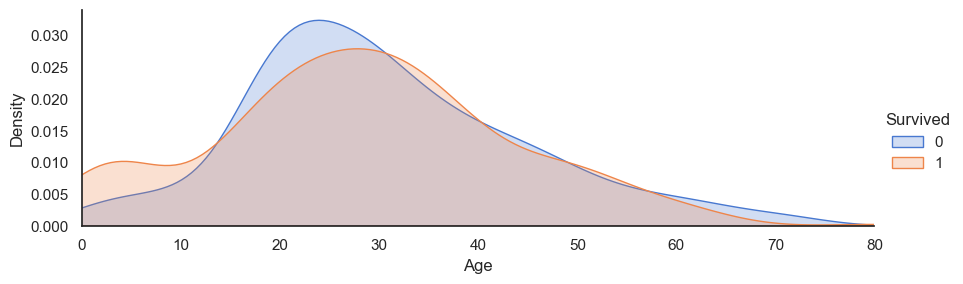

In [124]:
ageFacet = sns.FacetGrid(train, hue='Survived', aspect=3)
ageFacet.map(sns.kdeplot, 'Age', shade=True)
ageFacet.set(xlim=(0, train['Age'].max()))
ageFacet.add_legend()

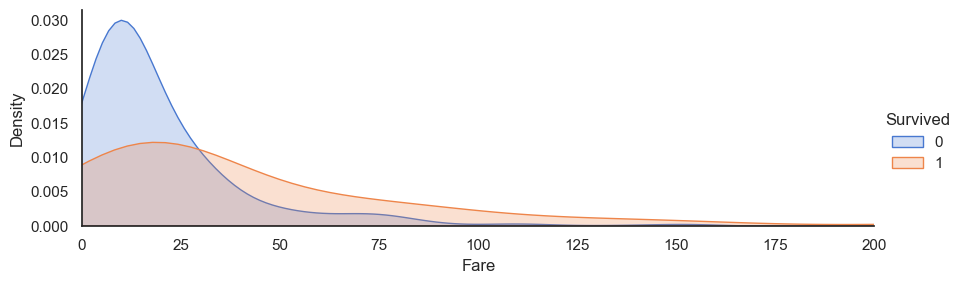

In [125]:
ageFacet = sns.FacetGrid(train, hue='Survived', aspect=3)
ageFacet.map(sns.kdeplot, 'Fare', shade=True)
ageFacet.set(xlim=(0, 200))
ageFacet.add_legend()

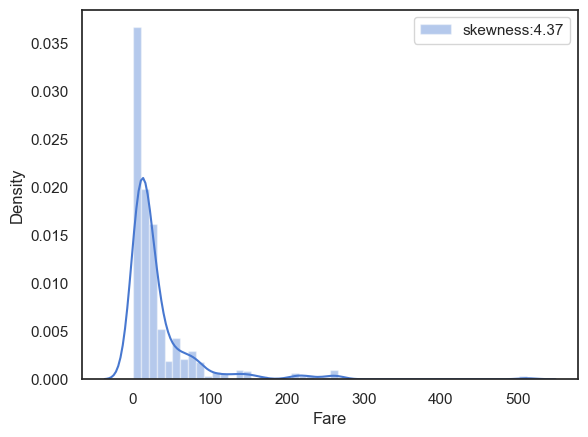

In [126]:
farePlot = sns.distplot(full['Fare'][full['Fare'].notnull()], label='skewness:%.2f'%(full['Fare'].skew()))
farePlot.legend(loc='best')

In [127]:
full['Fare'] = full['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

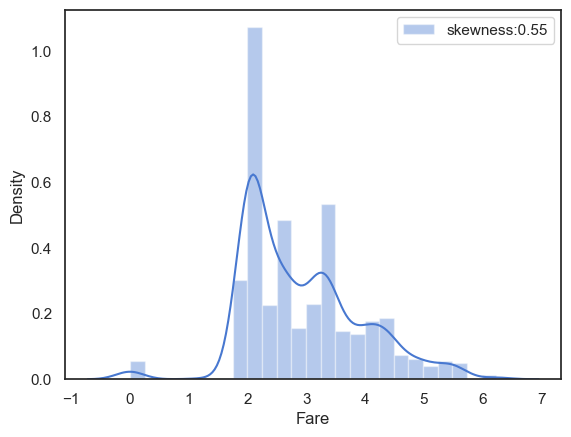

In [128]:
farePlot = sns.distplot(full['Fare'][full['Fare'].notnull()], label='skewness:%.2f'%(full['Fare'].skew()))
farePlot.legend(loc='best')

In [129]:
full['Cabin'] = full['Cabin'].fillna('U')
full['Cabin']

0          U
1        C85
2          U
3       C123
4          U
        ... 
1304       U
1305    C105
1306       U
1307       U
1308       U
Name: Cabin, Length: 1309, dtype: object

In [130]:
full[full['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,4.382027,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,4.382027,B28,NaN


In [131]:
full['Embarked'] = full['Embarked'].fillna('S')

In [132]:
full[full['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [133]:
full['Embarked'].value_counts()

Embarked
S    916
C    270
Q    123
Name: count, dtype: int64

In [134]:
full['Embarked'] = full['Embarked'].fillna('S')

In [135]:
full[full['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [136]:
full['Title']=full['Name'].map(lambda x:x.split(',')[1].split('.')[0].strip())
full['Title'].value_counts()

Title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [137]:
TitleDict={}
TitleDict['Mr']='Mr'
TitleDict['Mlle']='Miss'
TitleDict['Miss']='Miss'
TitleDict['Master']='Master'
TitleDict['Jonkheer']='Master'
TitleDict['Mme']='Mrs'
TitleDict['Ms']='Mrs'
TitleDict['Mrs']='Mrs'
TitleDict['Don']='Royalty'
TitleDict['Sir']='Royalty'
TitleDict['the Countess']='Royalty'
TitleDict['Dona']='Royalty'
TitleDict['Lady']='Royalty'
TitleDict['Capt']='Officer'
TitleDict['Col']='Officer'
TitleDict['Major']='Officer'
TitleDict['Dr']='Officer'
TitleDict['Rev']='Officer'

full['Title']=full['Title'].map(TitleDict)
full['Title'].value_counts()

Title
Mr         757
Miss       262
Mrs        200
Master      62
Officer     23
Royalty      5
Name: count, dtype: int64

<Axes: xlabel='Title', ylabel='Survived'>

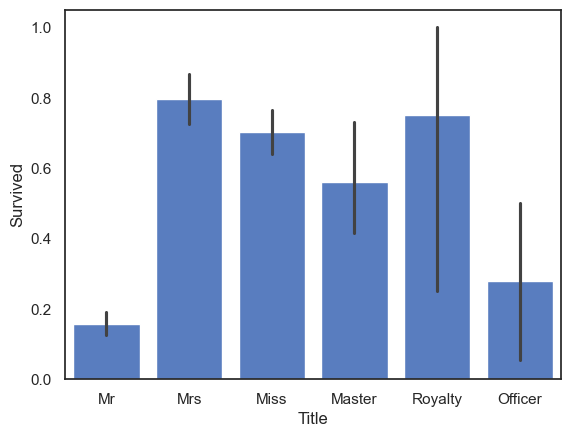

In [138]:
sns.barplot(data=full,x='Title', y='Survived')

<Axes: xlabel='familyNum', ylabel='Survived'>

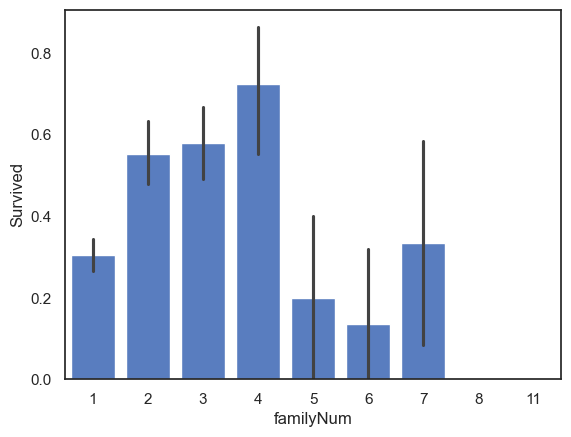

In [139]:
full['familyNum'] = full['Parch'] + full['SibSp'] + 1
sns.barplot(data=full, x='familyNum', y='Survived')

In [140]:
def familySize(familyNum):
    if familyNum == 1:
        return 'Single'
    elif familyNum <= 4:
        return 'Middle'
    else:
        return 'Large'
    
full['familySize'] = full['familyNum'].map(familySize) # map(function, iterable, ...) is to apply function to every item of iterable
full['familySize'].value_counts()

familySize
Single    790
Middle    437
Large      82
Name: count, dtype: int64

In [141]:
full

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,familyNum,familySize
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,U,S,Mr,2,Middle
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,Mrs,2,Middle
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,U,S,Miss,1,Single
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,Mrs,2,Middle
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,U,S,Mr,1,Single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,2.085672,U,S,Mr,1,Single
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,4.690430,C105,C,Royalty,1,Single
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,1.981001,U,S,Mr,1,Single
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,2.085672,U,S,Mr,1,Single


<Axes: xlabel='familySize', ylabel='Survived'>

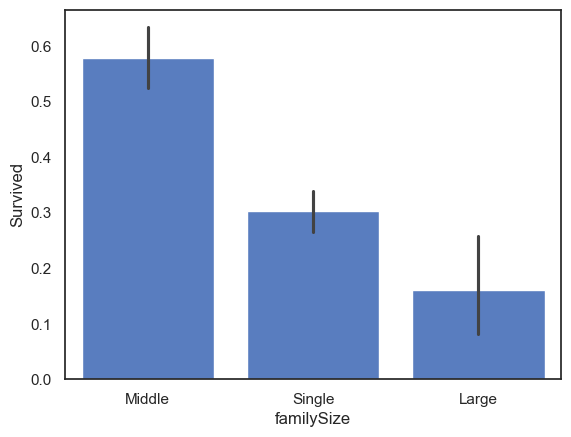

In [142]:
sns.barplot(data=full, x='familySize', y='Survived')

<Axes: xlabel='Deck', ylabel='Survived'>

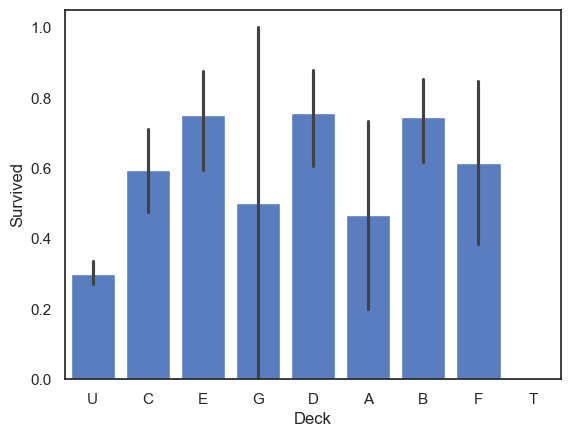

In [143]:
full['Deck'] = full['Cabin'].map(lambda x: x[0])
sns.barplot(data=full, x='Deck', y='Survived')

In [144]:
TickCountDict = {}
TickCountDict = full['Ticket'].value_counts()
TickCountDict.head()

Ticket
CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
Name: count, dtype: int64

In [145]:
full['TickCot'] = full['Ticket'].map(TickCountDict)
full['TickCot']

0       1
1       2
2       1
3       2
4       1
       ..
1304    1
1305    3
1306    1
1307    1
1308    3
Name: TickCot, Length: 1309, dtype: int64

<Axes: xlabel='TickCot', ylabel='Survived'>

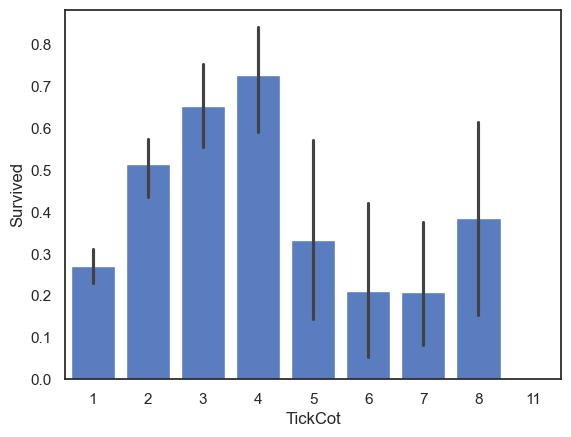

In [146]:
sns.barplot(data=full, x='TickCot', y='Survived')   

<Axes: xlabel='TickGroup', ylabel='Survived'>

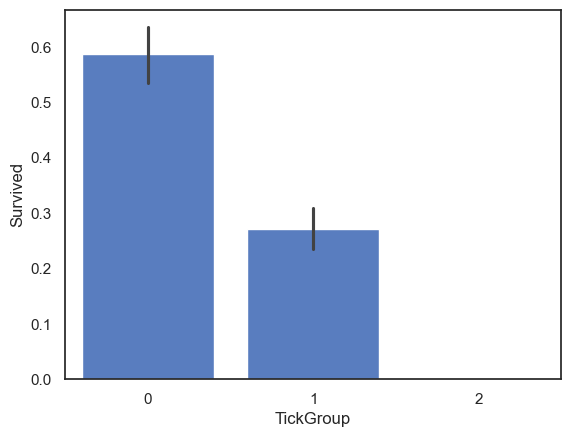

In [147]:
def TickCountGroup(num):
    if (num >= 2) and (num <= 4):
        return 0
    elif (num == 1) or ((num >= 5) and (num <= 8)):
        return 1
    else:
        return 2

full['TickGroup'] = full['TickCot'].map(TickCountGroup)
sns.barplot(data=full, x='TickGroup', y='Survived')

In [148]:
full[full['Age'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,familyNum,familySize,Deck,TickCot,TickGroup
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,2.135148,U,Q,Mr,1,Single,U,1,1
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,2.564949,U,S,Mr,1,Single,U,1,1
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,1.977547,U,C,Mrs,1,Single,U,1,1
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,1.977547,U,C,Mr,1,Single,U,1,1
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,2.064226,U,Q,Miss,1,Single,U,1,1


In [149]:
full

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,familyNum,familySize,Deck,TickCot,TickGroup
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,U,S,Mr,2,Middle,U,1,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,Mrs,2,Middle,C,2,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,U,S,Miss,1,Single,U,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,Mrs,2,Middle,C,2,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,U,S,Mr,1,Single,U,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,2.085672,U,S,Mr,1,Single,U,1,1
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,4.690430,C105,C,Royalty,1,Single,C,3,0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,1.981001,U,S,Mr,1,Single,U,1,1
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,2.085672,U,S,Mr,1,Single,U,1,1


In [150]:
AgePre = full[['Age', 'Parch', 'Pclass', 'SibSp', 'Title', 'familyNum', 'TickCot']]
AgePre = pd.get_dummies(AgePre)
ParAge = pd.get_dummies(AgePre['Parch'], prefix='Parch')
SibAge = pd.get_dummies(AgePre['SibSp'], prefix='SibSp')
PclAge = pd.get_dummies(AgePre['Pclass'], prefix='Pclass')

ageCorrDf = pd.DataFrame()
AgeCorrDf = AgePre.corr()
AgeCorrDf['Age'].sort_values()

Pclass          -0.408106
Title_Master    -0.385380
Title_Miss      -0.282977
SibSp           -0.243699
familyNum       -0.240229
TickCot         -0.185284
Parch           -0.150917
Title_Royalty    0.057337
Title_Officer    0.166771
Title_Mr         0.183965
Title_Mrs        0.215091
Age              1.000000
Name: Age, dtype: float64

In [151]:
AgePre = pd.concat([AgePre, ParAge, SibAge, PclAge], axis=1)
AgePre.head()

,Age,Parch,Pclass,SibSp,familyNum,TickCot,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Pclass_1,Pclass_2,Pclass_3
0,22.0,0,3,1,2,1,False,False,True,False,...,False,True,False,False,False,False,False,False,False,True
1,38.0,0,1,1,2,2,False,False,False,True,...,False,True,False,False,False,False,False,True,False,False
2,26.0,0,3,0,1,1,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True
3,35.0,0,1,1,2,2,False,False,False,True,...,False,True,False,False,False,False,False,True,False,False
4,35.0,0,3,0,1,1,False,False,True,False,...,True,False,False,False,False,False,False,False,False,True


In [152]:
AgeKnown = AgePre[AgePre['Age'].notnull()]
AgeUnKnown = AgePre[AgePre['Age'].isnull()]

AgeKnown_X = AgeKnown.drop(['Age'], axis=1)
AgeKnown_y = AgeKnown['Age']

AgeYnKnown_X = AgeUnKnown.drop(['Age'],axis=1)

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=0, n_estimators=500, n_jobs=-1)
rfr.fit(AgeKnown_X, AgeKnown_y)

RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=0)

In [153]:
rfr.score(AgeKnown_X, AgeKnown_y)

0.5867366822469289

In [154]:
AgeUnKnown_y = rfr.predict(AgeYnKnown_X)
full.loc[full['Age'].isnull(), ['Age']] = AgeUnKnown_y

full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
 12  Title        1309 non-null   object 
 13  familyNum    1309 non-null   int64  
 14  familySize   1309 non-null   object 
 15  Deck         1309 non-null   object 
 16  TickCot      1309 non-null   int64  
 17  TickGroup    1309 non-null   int64  
dtypes: float64(3), int64(7), object(8)
memory usage:

In [155]:
full['Surname'] = full['Name'].map(lambda x: x.split(',')[0].strip())
SurnameDict = {}
SurNameDict = full['Surname'].value_counts()
full['SurnameNum'] = full['Surname'].map(SurNameDict)

MaleDf=full[(full['Sex']=='male')&(full['Age']>12)&(full['familyNum']>=2)]
FemChildDf=full[((full['Sex']=='female')|(full['Age']<=12))&(full['familyNum']>=2)]

In [156]:
MSurNamDf = MaleDf['Survived'].groupby(MaleDf['Surname']).mean()
MSurNamDf.head()
MSurNamDf.value_counts()

Survived
0.0    89
1.0    19
0.5     3
Name: count, dtype: int64

In [157]:
MSurNamDict = {}
MSurNamDict = MSurNamDf[MSurNamDf.values == 1].index
MSurNamDict

Index(['Beane', 'Beckwith', 'Bishop', 'Cardeza', 'Chambers', 'Dick',
       'Duff Gordon', 'Frauenthal', 'Frolicher-Stehli', 'Goldenberg',
       'Greenfield', 'Harder', 'Hoyt', 'Kimball', 'Lindqvist', 'McCoy',
       'Nakid', 'Persson', 'Taylor'],
      dtype='object', name='Surname')

In [158]:
FCSurNamDf = FemChildDf['Survived'].groupby(FemChildDf['Surname']).mean()
FCSurNamDf.head()
FCSurNamDf.value_counts()

Survived
1.000000    115
0.000000     27
0.750000      2
0.333333      1
0.142857      1
Name: count, dtype: int64

In [159]:
FCSurNamDict={}
FCSurNamDict=FCSurNamDf[FCSurNamDf.values==0].index
FCSurNamDict

Index(['Ahlin', 'Arnold-Franchi', 'Barbara', 'Boulos', 'Bourke', 'Caram',
       'Danbom', 'Ford', 'Goodwin', 'Ilmakangas', 'Johnston', 'Jussila',
       'Lahtinen', 'Lefebre', 'Lobb', 'Palsson', 'Panula', 'Rice', 'Robins',
       'Rosblom', 'Sage', 'Skoog', 'Strom', 'Turpin', 'Van Impe',
       'Vander Planke', 'Zabour'],
      dtype='object', name='Surname')

In [160]:
full.loc[(full['Survived'].isnull())&(full['Surname'].isin(MSurNamDict))&(full['Sex']=='male'),'Age']=5

full.loc[(full['Survived'].isnull())&(full['Surname'].isin(MSurNamDict))&(full['Sex']=='male'),'Sex']='female'

In [161]:
full.loc[(full['Survived'].isnull())&(full['Surname'].isin(FCSurNamDict))&((full['Sex']=='female')|(full['Age']<=12)),'Age']=60
full.loc[(full['Survived'].isnull())&(full['Surname'].isin(FCSurNamDict))&((full['Sex']=='female')|(full['Age']<=12)),'Sex']='male'

In [162]:
full

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,familyNum,familySize,Deck,TickCot,TickGroup,Surname,SurnameNum
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,1.981001,U,S,Mr,2,Middle,U,1,1,Braund,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,4.266662,C85,C,Mrs,2,Middle,C,2,0,Cumings,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,2.070022,U,S,Miss,1,Single,U,1,1,Heikkinen,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,3.972177,C123,S,Mrs,2,Middle,C,2,0,Futrelle,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,2.085672,U,S,Mr,1,Single,U,1,1,Allen,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,28.553583,0,0,A.5. 3236,2.085672,U,S,Mr,1,Single,U,1,1,Spector,1
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,4.690430,C105,C,Royalty,1,Single,C,3,0,Oliva y Ocana,1
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,1.981001,U,S,Mr,1,Single,U,1,1,Saether,1
1307,1308,NaN,3,"Ware, Mr. Frederick",male,28.553583,0,0,359309,2.085672,U,S,Mr,1,Single,U,1,1,Ware,4


In [168]:
#人工筛选
fullSel=full.drop(['Cabin','Name','Ticket','PassengerId','Surname','SurnameNum'],axis=1)
fullSel.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,familyNum,familySize,Deck,TickCot,TickGroup
0,0.0,3,male,22.0,1,0,1.981001,S,Mr,2,Middle,U,1,1
1,1.0,1,female,38.0,1,0,4.266662,C,Mrs,2,Middle,C,2,0
2,1.0,3,female,26.0,0,0,2.070022,S,Miss,1,Single,U,1,1
3,1.0,1,female,35.0,1,0,3.972177,S,Mrs,2,Middle,C,2,0
4,0.0,3,male,35.0,0,0,2.085672,S,Mr,1,Single,U,1,1


In [171]:
#查看各特征与标签的相关性
corrDf=pd.DataFrame()
corrDf=fullSel.corr()

ValueError: could not convert string to float: 'male'

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(fullSel[['Survived','Age','Embarked','Fare','Parch','Pclass',
                    'Sex','SibSp','Title','familyNum','familySize','Deck',
                     'TickCot','TickGroup']].corr(),cmap='BrBG',annot=True,
           linewidths=.5)
plt.xticks(rotation=45)

ValueError: could not convert string to float: 'S'

<Figure size 800x800 with 0 Axes>

In [172]:
fullSel=fullSel.drop(['familyNum','SibSp','TickCot','Parch'],axis=1)
#one-hot编码
fullSel=pd.get_dummies(fullSel)
PclassDf=pd.get_dummies(full['Pclass'],prefix='Pclass')
TickGroupDf=pd.get_dummies(full['TickGroup'],prefix='TickGroup')
familySizeDf=pd.get_dummies(full['familySize'],prefix='familySize')

fullSel=pd.concat([fullSel,PclassDf,TickGroupDf,familySizeDf],axis=1)

In [173]:
#拆分实验数据与预测数据
experData=fullSel[fullSel['Survived'].notnull()]
preData=fullSel[fullSel['Survived'].isnull()]

experData_X=experData.drop('Survived',axis=1)
experData_y=experData['Survived']
preData_X=preData.drop('Survived',axis=1)

#导入机器学习算法库
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold

#设置kfold，交叉采样法拆分数据集
kfold=StratifiedKFold(n_splits=10)

#汇总不同模型算法
classifiers=[]
classifiers.append(SVC())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(ExtraTreesClassifier())
classifiers.append(GradientBoostingClassifier())
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression())
classifiers.append(LinearDiscriminantAnalysis())

In [174]:
#不同机器学习交叉验证结果汇总
cv_results=[]
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier,experData_X,experData_y,
                                      scoring='accuracy',cv=kfold,n_jobs=-1))

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [175]:
#求出模型得分的均值和标准差
cv_means=[]
cv_std=[]
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
#汇总数据
cvResDf=pd.DataFrame({'cv_mean':cv_means,
                     'cv_std':cv_std,
                     'algorithm':['SVC','DecisionTreeCla','RandomForestCla','ExtraTreesCla',
                                  'GradientBoostingCla','KNN','LR','LinearDiscrimiAna']})

cvResDf

,cv_mean,cv_std,algorithm
0,0.768926,0.047583,SVC
1,0.777853,0.050760,DecisionTreeCla
2,0.812609,0.043032,RandomForestCla
3,0.800250,0.039989,ExtraTreesCla
4,0.832821,0.041315,GradientBoostingCla
5,0.796891,0.042280,KNN
6,0.829438,0.033429,LR
7,0.823833,0.029460,LinearDiscrimiAna


ValueError: 'xerr' (shape: (8,)) must be a scalar or a 1D or (2, n) array-like whose shape matches 'x' (shape: (1,))

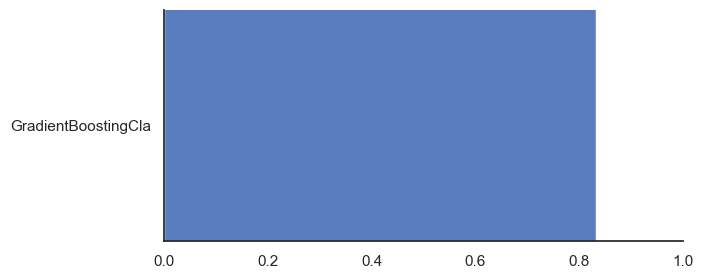

In [181]:
# sns.barplot(data=cvResDf,x='cv_mean',y='algorithm',**{'xerr':cv_std})

cvResFacet=sns.FacetGrid(cvResDf.sort_values(by='cv_mean',ascending=False),sharex=False,
            sharey=False,aspect=2)
cvResFacet.map(sns.barplot,'cv_mean','algorithm',**{'xerr':cv_std},
               palette='muted')
cvResFacet.set(xlim=(0.7,0.9))
cvResFacet.add_legend()

In [177]:
#GradientBoostingClassifier模型
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }
modelgsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, 
                                     scoring="accuracy", n_jobs= -1, verbose = 1)
modelgsGBC.fit(experData_X,experData_y)

#LogisticRegression模型
modelLR=LogisticRegression()
LR_param_grid = {'C' : [1,2,3],
                'penalty':['l1','l2']}
modelgsLR = GridSearchCV(modelLR,param_grid = LR_param_grid, cv=kfold, 
                                     scoring="accuracy", n_jobs= -1, verbose = 1)
modelgsLR.fit(experData_X,experData_y)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


ValueError: 
All the 720 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
420 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 96, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'loss' parameter of GradientBoostingClassifier must be a str among {'exponential', 'log_loss'}. Got 'deviance' instead.

--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 96, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'loss' parameter of GradientBoostingClassifier must be a str among {'log_loss', 'exponential'}. Got 'deviance' instead.


In [178]:
#modelgsGBC模型
print('modelgsGBC模型得分为：%.3f'%modelgsGBC.best_score_)
#modelgsLR模型
print('modelgsLR模型得分为：%.3f'%modelgsLR.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [179]:
#查看模型ROC曲线
#求出测试数据模型的预测值
modelgsGBCtestpre_y=modelgsGBC.predict(experData_X).astype(int)
#画图
from sklearn.metrics import roc_curve, auc  ###计算roc和auc
# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(experData_y, modelgsGBCtestpre_y) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值

plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='r',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Titanic GradientBoostingClassifier Model')
plt.legend(loc="lower right")
plt.show()

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.